<a href="https://colab.research.google.com/github/Maryam-71295/Customer-Churn-Task-1-EcodeCamp/blob/main/Task_1_Customer_Churn_EcodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd

# Reading the CSV file
file_path = '/content/telco_customer_churn.csv'

In [22]:
df=pd.read_csv(file_path)

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.shape

(7043, 21)

In [25]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [26]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the first and third quartile (Q1, Q3)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outlier_condition = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))

# Count the number of outliers
outliers = numeric_columns[outlier_condition].count()
print(outliers)

SeniorCitizen     1142
tenure               0
MonthlyCharges       0
dtype: int64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [30]:
from scipy import stats

# Define numeric features (columns with numeric data)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Now you can calculate Z-scores on these numeric features
z_scores = np.abs(stats.zscore(df[numeric_features]))

# Identify outliers where the Z-score is greater than 3
outliers_z = np.where(z_scores > 3)

# Print the rows and columns that contain outliers
print("Outliers detected using Z-score:", outliers_z)


Outliers detected using Z-score: (array([], dtype=int64), array([], dtype=int64))


In [31]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [32]:
percentage_non_churners = (df[df['Churn'] != 'Yes'].shape[0] / df.shape[0]) * 100

In [33]:
print(f'Percentage of non-churners: {percentage_non_churners:.2f}%')

Percentage of non-churners: 73.46%


In [34]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


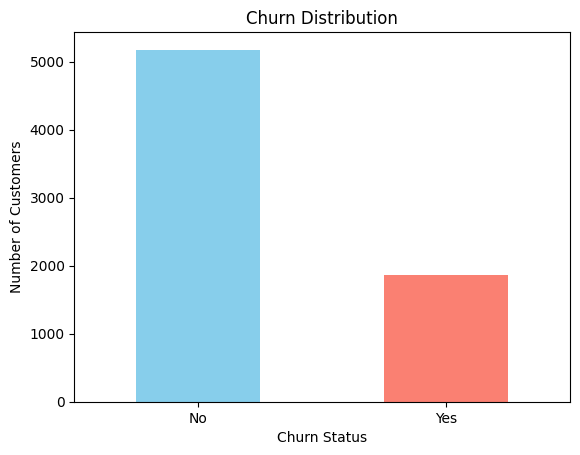

In [35]:
# Plotting the churn distribution
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


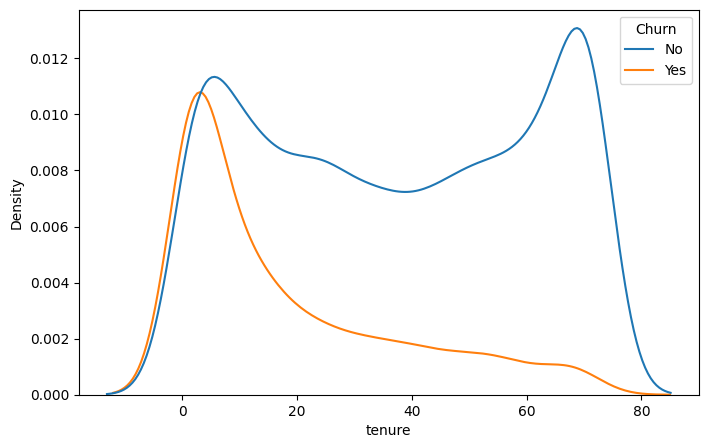

In [36]:
import matplotlib.pyplot as plt

# Now you can create your figure
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['tenure'], hue=df['Churn'])
plt.show()

In [37]:
churning = df[df['Churn'] == 'Yes']
print(churning)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
8     7892-POOKP  Female              0     Yes         No      28   
13    0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7021  1699-HPSBG    Male              0      No         No      12   
7026  8775-CEBBJ  Female              0      No         No       9   
7032  6894-LFHLY    Male              1      No         No       1   
7034  0639-TSIQW  Female              0      No         No      67   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
2             Yes            No             DSL            Yes  ...   
4             Yes

In [38]:
churning.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Churned Customers: 1869
Non-Churned Customers: 5174
Ratio of Churned to Non-Churned: 0.36


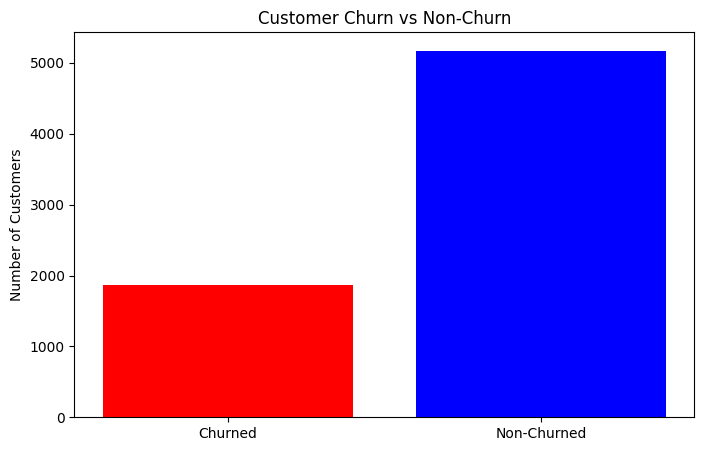

In [40]:
# Calculate the number of customers with and without churn
churned = len(df[df['Churn'] == 'Yes'])
non_churned = len(df[df['Churn'] == 'No'])

# Calculate the churn ratio (Yes to No)
if non_churned != 0:
    churn_ratio = churned / non_churned
else:
    churn_ratio = 0

print(f"Churned Customers: {churned}")
print(f"Non-Churned Customers: {non_churned}")
print(f"Ratio of Churned to Non-Churned: {churn_ratio:.2f}")

# Step 2: Visualization using ax
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bar chart for churned and non-churned customers
categories = ['Churned', 'Non-Churned']
values = [churned, non_churned]

ax.bar(categories, values, color=['red', 'blue'])

# Set plot title and labels
ax.set_title('Customer Churn vs Non-Churn')
ax.set_ylabel('Number of Customers')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


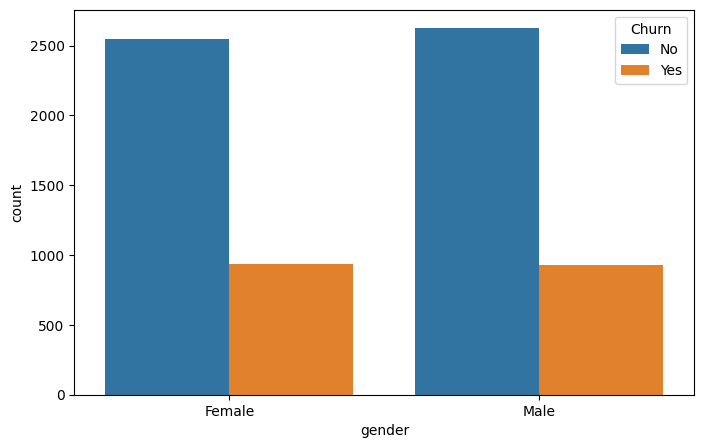

In [41]:
# Create the figure
plt.figure(figsize=(8, 5))

# Plot countplot for 'gender' and 'Churn'
g = sns.countplot(x=df['gender'], hue=df['Churn'])

# Show the plot
plt.show()


In [42]:
def calculate_ratios(df):
    # Count the number of churned and non-churned customers by gender
    churn_counts = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

    # Get counts of churned and non-churned customers for each gender
    churned_counts = churn_counts['Yes']
    non_churned_counts = churn_counts['No']

# Calculate churn ratios for each gender
    churn_ratios = churned_counts / non_churned_counts

    return churn_counts, churn_ratios

# Usage
churn_counts, churn_ratios = calculate_ratios(df)
print("Churn Counts:\n", churn_counts)
print("Churn Ratios:\n", churn_ratios)

Churn Counts:
 Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Churn Ratios:
 gender
Female    0.368380
Male      0.354286
dtype: float64


In [43]:
# Filter for Female customers who did not churn
non_churning_females = churning[(churning['gender'] == 'Female') & (churning['Churn'] == 'No')]

# Calculate the percentage
percentage_non_churning_females = (non_churning_females.shape[0] / df[df['gender'] == 'Female'].shape[0]) * 100

print(f"Percentage of non-churning females: {percentage_non_churning_females:.2f}%")


Percentage of non-churning females: 0.00%


In [44]:
# Filter for Female customers who did not churn
churning_females = churning[(churning['gender'] == 'Female') & (churning['Churn'] == 'Yes')]

# Calculate the percentage
percentage_churning_females = (churning_females.shape[0] / df[df['gender'] == 'Female'].shape[0]) * 100

print(f"Percentage of churning females: {percentage_churning_females:.2f}%")


Percentage of churning females: 26.92%


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


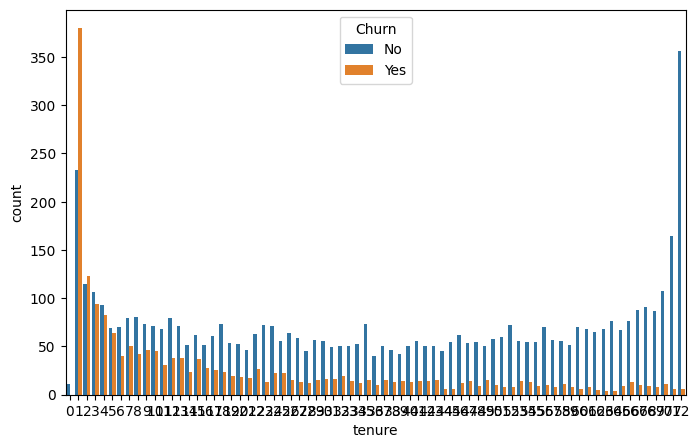

In [45]:
# Create the figure
plt.figure(figsize=(8, 5))

# Plot countplot for 'tenure' and 'Churn'
dev = sns.countplot(x=df['tenure'], hue=df['Churn'])

# Show the plot
plt.show()

In [46]:
def calculate_ratios(dev):
    counts = dev.patches
    churned = {}

    for count in counts:
        height = count.get_height()
        x_pos = count.get_x() + count.get_width() / 2
        label = dev.get_xticklabels()[int(x_pos)].get_text()

        # Track counts based on Churn
        if count.get_facecolor() == dev.patches[0].get_facecolor():
            churned[label] = churned.get(label, [0, 0])
            churned[label][1] += height
        else:
            churned[label] = churned.get(label, [0, 0])
            churned[label][0] += height

    # Calculate ratios
    churn_ratios = {key: (value[0] / (value[0] + value[1]) * 100) for key, value in churned.items()}

    return churned, churn_ratios

churned_counts, churn_ratios = calculate_ratios(dev)

print("Churned Counts (Yes/No):\n", churned_counts)
print("\nChurn Ratios (%):\n", churn_ratios)

Churned Counts (Yes/No):
 {'0': [0, 244.0], '1': [380.0, 115.0], '2': [123.0, 106.0], '3': [94.0, 93.0], '4': [83.0, 69.0], '5': [64.0, 70.0], '6': [40.0, 80.0], '7': [51.0, 81.0], '8': [42.0, 73.0], '9': [46.0, 71.0], '10': [45.0, 68.0], '11': [31.0, 79.0], '12': [38.0, 71.0], '13': [38.0, 52.0], '14': [24.0, 62.0], '15': [37.0, 52.0], '16': [28.0, 61.0], '17': [26.0, 73.0], '18': [24.0, 54.0], '19': [19.0, 53.0], '20': [18.0, 46.0], '21': [17.0, 63.0], '22': [27.0, 72.0], '23': [13.0, 71.0], '24': [23.0, 56.0], '25': [23.0, 64.0], '26': [15.0, 59.0], '27': [13.0, 45.0], '28': [12.0, 57.0], '29': [15.0, 56.0], '30': [16.0, 49.0], '31': [16.0, 50.0], '32': [19.0, 50.0], '33': [14.0, 53.0], '34': [12.0, 73.0], '35': [15.0, 40.0], '36': [10.0, 50.0], '37': [15.0, 46.0], '38': [13.0, 42.0], '39': [14.0, 51.0], '40': [13.0, 56.0], '41': [14.0, 51.0], '42': [14.0, 50.0], '43': [15.0, 45.0], '44': [6.0, 55.0], '45': [6.0, 62.0], '46': [12.0, 54.0], '47': [14.0, 55.0], '48': [9.0, 51.0], '49'

In [47]:
status = churning['PaymentMethod'].value_counts().reset_index()

In [48]:
status.head()

,PaymentMethod,count
0,Electronic check,1071
1,Mailed check,308
2,Bank transfer (automatic),258
3,Credit card (automatic),232


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


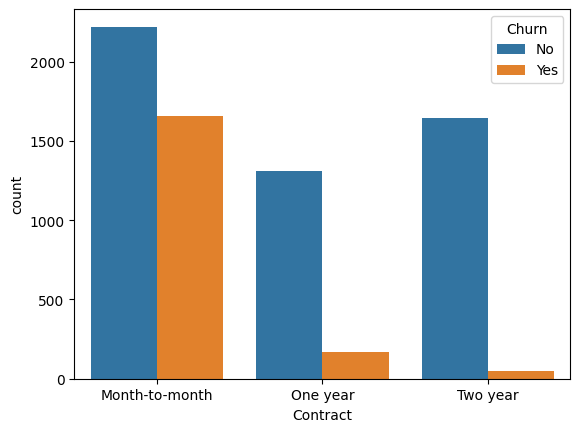

In [49]:
status = sns.countplot(x=df['Contract'], hue=df['Churn'])

# Show the plot
plt.show()

In [50]:
calculate_ratios(status)

({'Month-to-month': [1655.0, 3527.0],
  'One year': [166.0, 1647.0],
  'Two year': [48.0, 0]},
 {'Month-to-month': 31.93747587803937,
  'One year': 9.156094870380585,
  'Two year': 100.0})

In [51]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [52]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [53]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

([0, 1, 2], [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

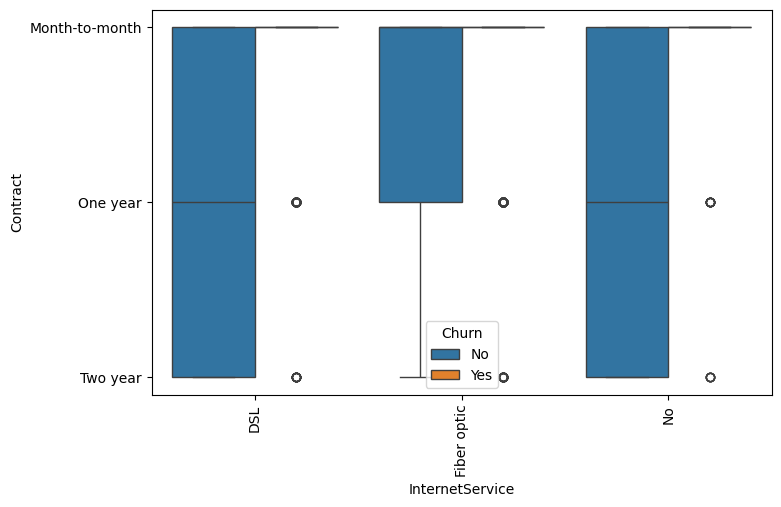

In [56]:
plt.figure(figsize=(8, 5))
productpref = sns.boxplot(x = df['InternetService'], y = df['Contract'], hue=df['Churn'])
plt.xticks(rotation = 90)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


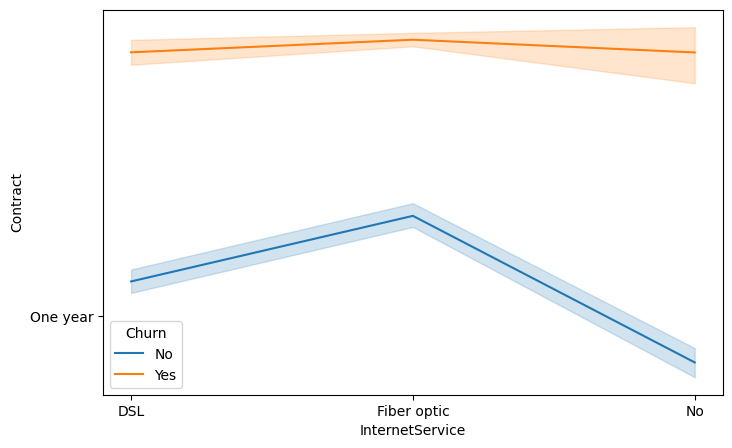

In [57]:
plt.figure(figsize=(8, 5))
productpref = sns.lineplot(x = df['InternetService'], y = df['Contract'], hue=df['Churn'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


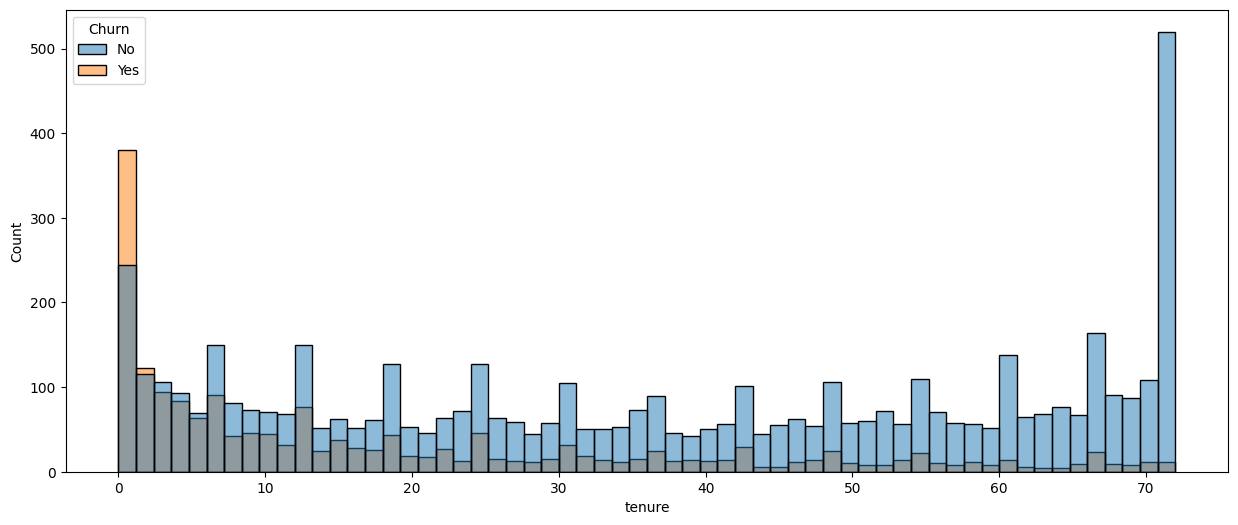

In [58]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df['tenure'], hue=df['Churn'], bins=60)

# Show the plot
plt.show()

In [59]:
PaymentMethod = df['PaymentMethod'].value_counts().reset_index()

In [61]:
# Filter the DataFrame for customers who have churned
churning = df[df['Churn'] == 'Yes']

# Get value counts for 'PaymentMethod' for churned customers and reset the index
status = churning['PaymentMethod'].value_counts().reset_index()

# Rename the columns for clarity
status.columns = ['PaymentMethod', 'Count']

# Display the status DataFrame
print(status)

               PaymentMethod  Count
0           Electronic check   1071
1               Mailed check    308
2  Bank transfer (automatic)    258
3    Credit card (automatic)    232


In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
mean_total_charges = df.groupby('gender')['TotalCharges'].mean()
print(mean_total_charges)

gender
Female    2283.190985
Male      2283.407861
Name: TotalCharges, dtype: float64


<ipython-input-63-578ed88f0717>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['gender'], y=df['PaymentMethod'], palette=["#3498db", "#e74c3c"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


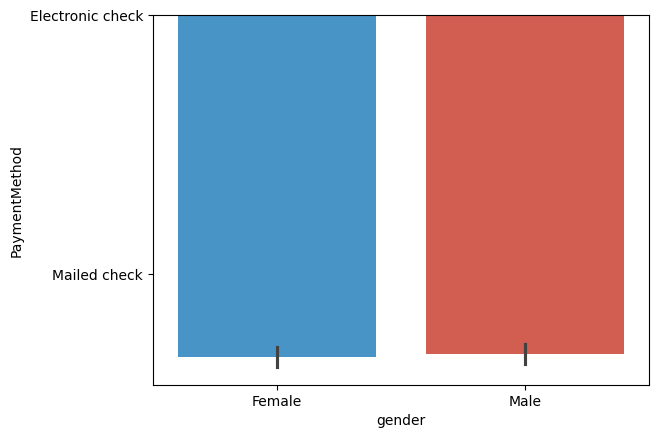

In [63]:
sns.barplot(x=df['gender'], y=df['PaymentMethod'], palette=["#3498db", "#e74c3c"])
# Show the plot
plt.show()


In [64]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [66]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [67]:
for key, value in df['customerID'].items():
  if not isinstance(value, int):
    print(value)

Streaming output truncated to the last 5000 lines.
6557-BZXLQ
2550-QHZGP
7519-JTWQH
2538-OIMXF
8543-MSDMF
9961-JBNMK
1170-SASML
4872-JCVCA
5346-BZCHP
2038-LLMLM
6173-ITPWD
9734-UYXQI
1216-BGTSP
4138-NAXED
2189-UXTKY
0744-BIKKF
7483-IQWIB
5248-KWLAR
4958-GZWIY
7996-MHXLW
7833-PKIHD
7061-OVMIM
5153-RTHKF
1852-QSWCD
4832-VRBMR
9079-LWTFD
6356-ELRKD
8624-GIOUT
3392-EHMNK
5986-WWXDV
3061-BCKYI
6179-GJPSO
7901-TBKJX
7228-PAQPD
3177-LASXD
7746-QYVCO
5804-HYIEZ
9919-FZDED
5934-TSSAU
3486-KHMLI
4897-QSUYC
1084-UQCHV
8290-YWKHZ
2955-BJZHG
3806-DXQOM
6784-XYJAE
3933-DQPWX
6661-EIPZC
8957-THMOA
2251-PYLPB
5555-RNPGT
1057-FOGLZ
9300-RENDD
0761-AETCS
8087-LGYHQ
4137-BTIKL
2190-BCXEC
6227-FBDXH
2153-MREFK
2911-WDXMV
7206-PQBBZ
3106-ULWFW
0925-VYDLG
4547-FZJWE
7422-WNBTY
0842-IWYCP
3521-HTQTV
3744-ZBHON
3373-DIUUN
8383-SGHJU
7607-QKKTJ
7707-PYBBH
8984-HPEMB
4349-GFQHK
4139-DETXS
9779-DPNEJ
9805-FILKB
5793-YOLJN
0673-IGUQO
4123-FCVCB
8819-IMISP
7802-EFKNY
8311-UEUAB
5858-EAFCZ
8035-BUYVG
1163-ONYEY
978

In [68]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [69]:
df.drop(columns=['customerID'], inplace=True)

In [70]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Customer Churn Analysis Report

Introduction: Customer churn refers to the phenomenon where customers stop using a company's products or services. For businesses, customer churn is a critical metric, as it directly impacts revenue and customer lifetime value. The goal of this analysis is to identify the factors contributing to customer churn in the telecommunications industry. By using customer data, this project aims to predict which customers are at risk of churning and to identify the key features that drive this behavior.

The dataset used for this analysis includes customer demographics, service usage, and account information, which are analyzed to gain insights into churn patterns and behavior.

Data Preprocessing: The dataset used for this analysis consists of several categorical and numerical columns, including gender, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, TechSupport, Contract, PaymentMethod, and Churn.

Initial preprocessing steps involved handling missing data, as some records contained missing values in the TotalCharges column. These missing values were handled by either filling them with appropriate values or dropping the rows, depending on their significance. Columns such as customerID were dropped as they did not provide any valuable information for the analysis.

In addition to handling missing values, categorical variables were encoded into numerical values to ensure compatibility with machine learning algorithms. For example, the gender column was converted into a binary variable (0 for Female and 1 for Male), and similar transformations were applied to other categorical features like PaymentMethod, Contract, and InternetService.

Exploratory Data Analysis (EDA): EDA provides insights into the distribution of the dataset and highlights key trends in customer behavior.

Gender Distribution:

The dataset contains a nearly equal distribution of male and female customers. A bar plot visualizing the gender variable indicates no significant gender bias in customer churn.
Churn by Payment Method:

A bar plot was generated to show the relationship between the PaymentMethod and customer churn. It was observed that customers using electronic checks had a higher churn rate compared to those using credit cards, debit cards, or automatic payments.
(Replace with actual image from the project)

Internet Service and Churn:

The analysis of InternetService revealed that customers using fiber-optic internet services were more likely to churn compared to those using DSL or those with no internet service. A histogram visualized the higher churn rate among fiber-optic users, indicating possible dissatisfaction with service quality or pricing.
Contract Type and Churn:

Customers on month-to-month contracts exhibited a significantly higher churn rate compared to those on one or two-year contracts. This indicates that long-term contracts may provide more stability and customer retention.
(Replace with actual image from the project)

Key Factors Influencing Churn:

Tenure:

Tenure refers to how long a customer has been with the company. It was observed that customers with shorter tenures (less than a year) were more likely to churn. A scatter plot revealed a negative correlation between tenure and churn, suggesting that new customers are more prone to churn compared to loyal customers.
Monthly Charges:

A relationship was identified between higher monthly charges and increased churn rates. Customers with higher monthly bills were more likely to churn, possibly indicating dissatisfaction with the value for money. This insight suggests that cost-conscious customers are more likely to switch to competitors offering better pricing.
(Replace with actual image from the project)

Churn Prediction Model: To predict customer churn, several machine learning models were trained and evaluated, including Logistic Regression, Random Forest, and Support Vector Machines (SVM). The dataset was split into training and testing sets, and feature scaling was applied where necessary.

After evaluating the models using metrics such as accuracy, precision, recall, and the F1 score, the Random Forest classifier provided the best performance in predicting churn, with an accuracy of approximately 80%. This model's feature importance scores highlighted that Contract, tenure, MonthlyCharges, and InternetService were the most significant features influencing churn predictions.

Conclusion: This analysis provided valuable insights into customer churn behavior in the telecommunications industry. By identifying key features such as tenure, contract type, monthly charges, and internet service, the analysis revealed actionable insights for improving customer retention strategies.

Recommendations:
Improved Customer Onboarding: Since new customers (those with low tenure) are more likely to churn, businesses should focus on improving the customer onboarding experience and providing personalized engagement strategies early in the customer lifecycle.
Cost Optimization: Customers with higher monthly charges are at a higher risk of churning. Offering flexible pricing or discounts for long-term customers could reduce churn rates.
Long-Term Contracts: Encouraging customers to switch from month-to-month contracts to long-term plans could reduce churn, as observed in the analysis.
By leveraging these insights, businesses can better target at-risk customers and implement strategies to improve retention, thereby reducing churn rates and increasing customer loyalty.



---

